# Parsing de páginas web em C++
## Rafael Molines Ismael
### Supercomputação - Igor Montagner

Neste projeto, nós alunos tivemos de criar um crawler de sites de comércio online, que retirasse informações de todos os produtos de um certa categoria. No meu caso, me baseei no site da Kabum e na categoria "Computadores Gamers". Contudo, é possível utilizar este mesmo programa para as demais categorias do site.
Para executar o programa, basta executar as células seguintes. Caso deseje, é possível alterar o número de threads e a url que são utilizados pelo crawler. Contudo, só são possíveis urls de páginas de categoria do site Kabum.

In [ ]:
num_threads = 16
url = "https://www.kabum.com.br/computadores/computador-gamer"

In [79]:
import argparse
import os
import matplotlib.pyplot as plt
import csv
from IPython.display import Image
import psutil
import cProfile
import pprint

pp = pprint.PrettyPrinter(indent=4)
seq_mem_file = "./seq_mem.jpg"
par_mem_file = "./par_mem.jpg"
par_time_file = "./par_time.txt"
seq_time_file = "./seq_time.txt"
seq_cpu_file = "./seq_pd.txt"
par_cpu_file = "./par_pd.txt"

In [82]:
os.system('cmake . && make')
par_time = open(par_time_file,"r+").read().strip('\n')
seq_time = open(seq_time_file,"r+").read().strip('\n')
os.system('mprof run ./webparser %s && mprof plot -o %s' % (url, seq_mem_file))
os.system('mprof run ./parallel_webparser %s %s && mprof plot -o %s' % (num_threads, url, par_mem_file))
os.system('./webparser %s' % (url))
os.system('./parallel_webparser %s %s' % (num_threads, url))
os.system('gprof parallel_webparser gmon.out > %s' % (par_cpu_file))
os.system('gprof webparser gmon.out > %s' % (seq_cpu_file))

0

## Sequencial

Abaixo, temos o gráfico de consumo de memória para a versão sequencial do crawler. Em seguida, o tempo de execução total do programa.

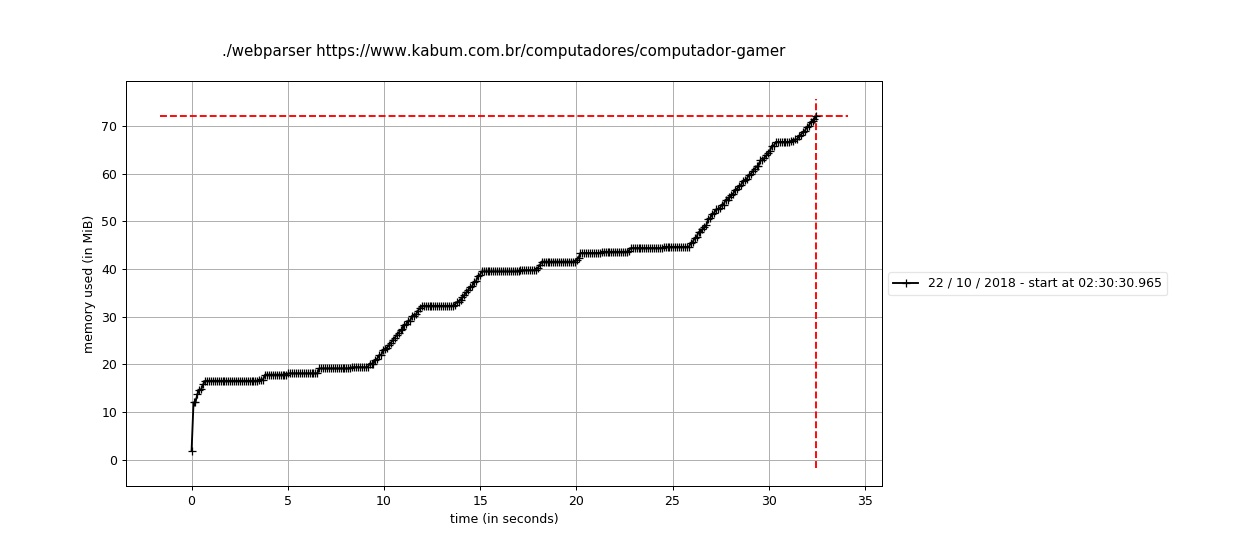

In [83]:
display(Image(filename=seq_mem_file))              

In [84]:
seq_time+' segundos'

'32.4085 segundos'

## Paralelo

Para paralelizar o programa, utilizei o algoritmo "Produtor-Consumidor" para poder paralelizar as tarefas de baixar as páginas da internet com o processamento das mesmas. A ordem segue mais ou menos assim: primeiro, se baixa a página dada pelo usuário. Assim que isso terminar, a página é processada para procurar informações da url das páginas dos produtos em si, e caso se aplique, a url da próxima página de listagem de produtos. Caso seja esse o caso, em seguida a mesma função que baixou a primeira página, baixa a próxima página de listagens. Ao mesmo tempo, um outro processo está também baixando as páginas de cada produto individual, e, à medida que os downloads são completados, uma outra função começa a processar essas páginas dos produtos em busca de suas informações, como nome, preço, descrição... 
A sincronização desses processos entre si é feita apenas através de semáforos. 

Aqui temos o gráfico de memória por tempo para a versão paralela do crawler. Em seguida, o tempo de execução total.

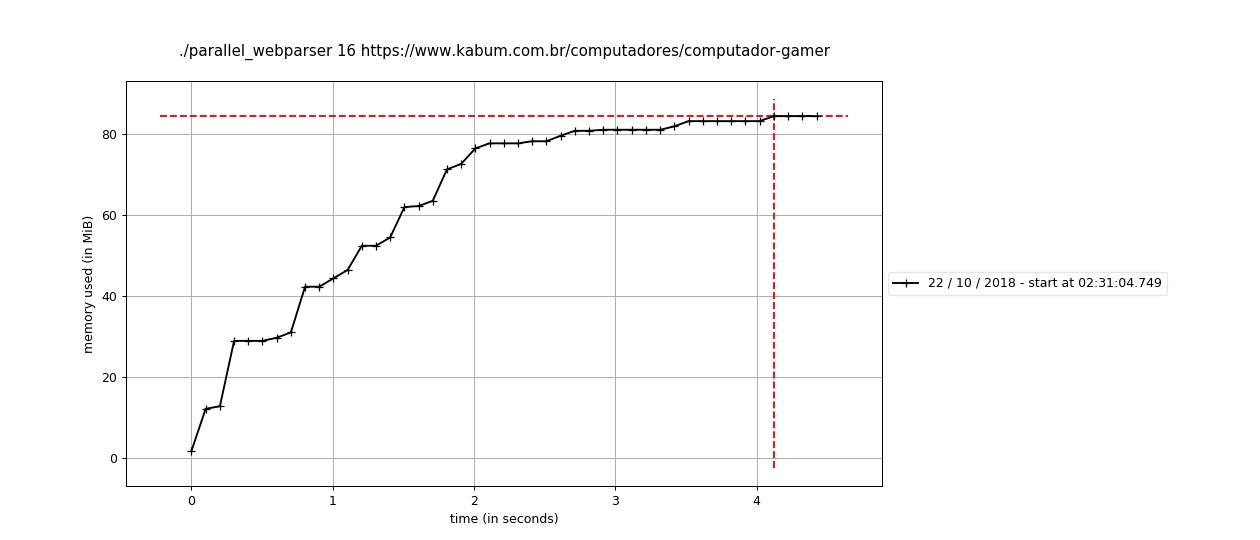

In [85]:
display(Image(filename=par_mem_file))          

In [86]:
par_time+' segundos'

'4.33065 segundos'

## Implementação

### Hardware

O  hardware utilizado para a implementação foi um laptop com Ubuntu 18.04LTS nativo, 16GB de memória RAM e um processador Intel 4720HQ, de 8 threads. O código foi escrito em C++ e o script que executa o código em Python.

### Software

Para o desenvolvimento do crawler, foram utilizadas as bibliotecas externas libcurl e cpr para o download das páginas, json for modern c++ para a formatação em json e gumbo para o parseamento das páginas.

In [87]:
file = (open('pd.txt', 'r+'))
for line in file:
    print(line)

Flat profile:



Each sample counts as 0.01 seconds.

 no time accumulated



  %   cumulative   self              self     total           

 time   seconds   seconds    calls  Ts/call  Ts/call  name    

  0.00      0.00     0.00     7506     0.00     0.00  cpr::CaseInsensitiveCompare::operator()(std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > const&, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > const&) const

  0.00      0.00     0.00     4890     0.00     0.00  cpr::Timeout::Milliseconds() const

  0.00      0.00     0.00     1455     0.00     0.00  frame_dummy

  0.00      0.00     0.00     1445     0.00     0.00  nlohmann::detail::output_stream_adapter<char>::write_character(char)

  0.00      0.00     0.00     1160     0.00     0.00  std::_Rb_tree<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::pair<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char>